In [1]:
import h5py
import pandas as pd
from pathlib import Path

repo_root = next(p for p in Path.cwd().parents if (p / "pyproject.toml").exists())

folder_name = repo_root / "results/sweep_theta" / "run_00003"

with h5py.File(folder_name / "stats.h5", "r", swmr=True) as fh:
    dset = fh["stats"]
    dset.refresh()
    fieldnames = [s.decode("utf-8") for s in dset.attrs["fieldnames"]]
    df = pd.DataFrame(dset[...], columns=fieldnames)

with h5py.File(folder_name / "state.h5", "r", swmr=True) as fh:
    dset_state = fh["state"]
    dset_time = fh["time"]
    dset_step = fh["step"]
    dset_state.refresh()
    dset_time.refresh()
    dset_step.refresh()
    state = dset_state[...]
    time = dset_time[...]
    step = dset_step[...]

<Axes: xlabel='t'>

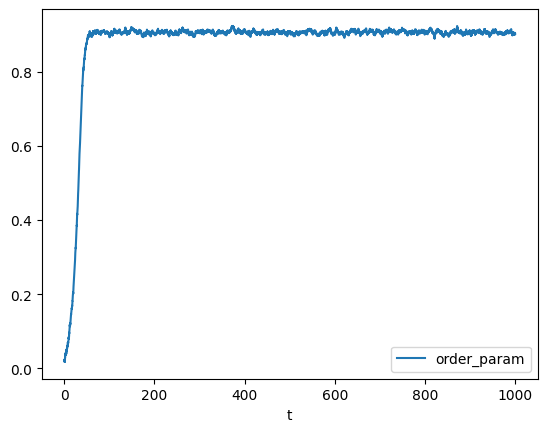

In [2]:
df.plot(x="t",y="order_param")

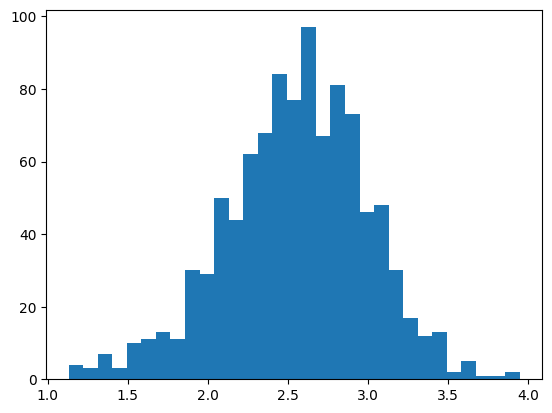

In [3]:
from matplotlib import pyplot as plt
import numpy as np
plt.hist(state[:,-1], bins=int(np.sqrt(state.shape[1])));